In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from graphviz import Source
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Admission_Predict.csv")
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0125475
R^2 Score: 0.3402341025289217


In [ ]:
!pip install pydotplus

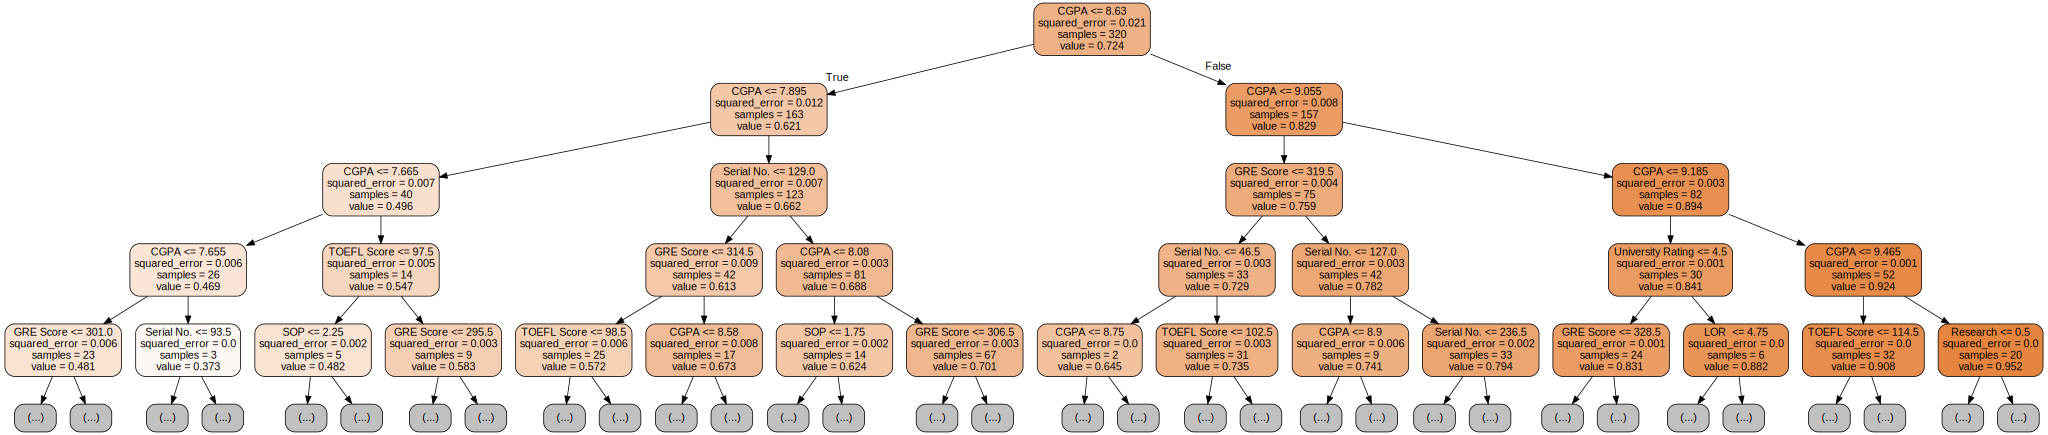

In [ ]:
# Plot the decision tree graph
export_graphviz(
    regressor,
    out_file="admission_tree.dot",
    filled=True, rounded=True,
    feature_names=X.columns,
    max_depth=4
 )

with open("admission_tree.dot") as f:
    dot_graph = f.read()

Source(dot_graph)

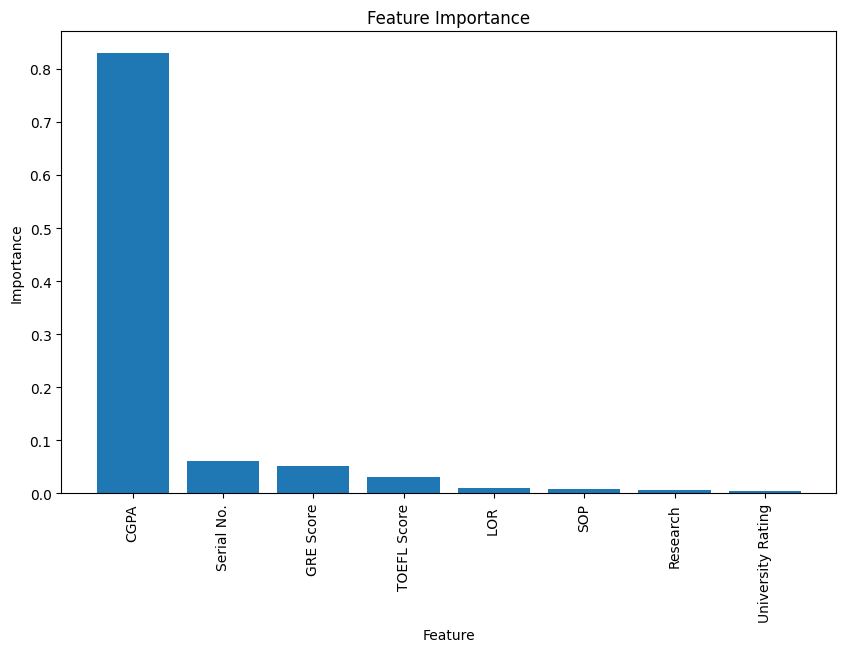

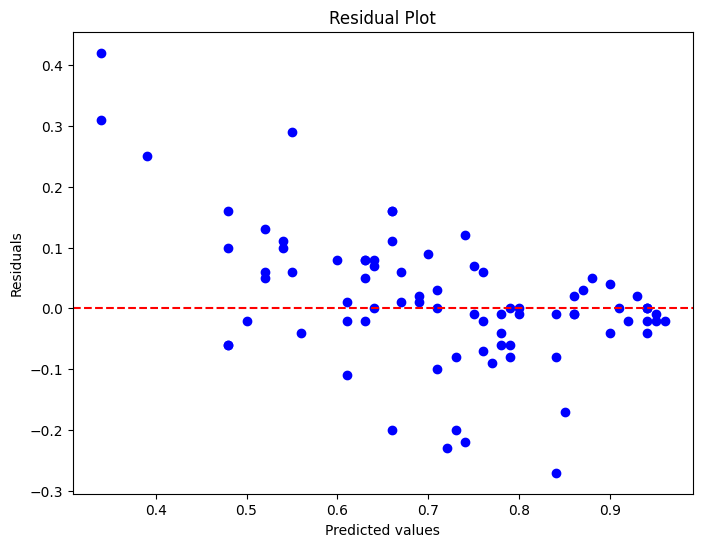

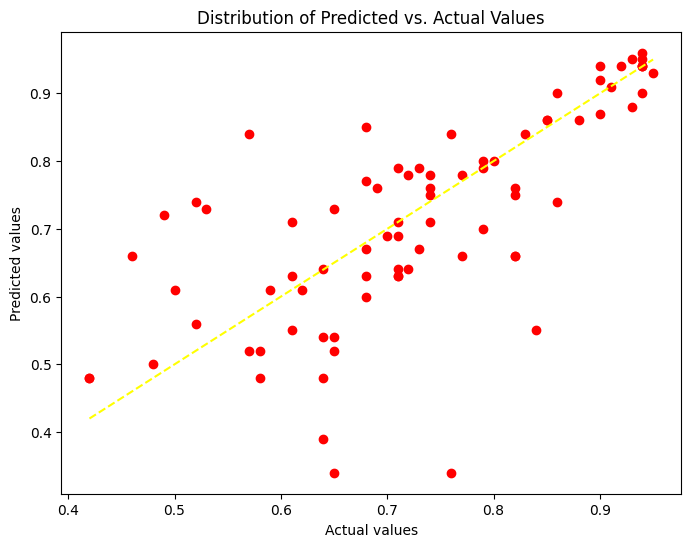

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

print()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

print()

# Distribution of Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Distribution of Predicted vs. Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='--')
plt.show()